In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Step 1:Profiling the list of features and analyzing them 
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
 df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
#Counting number of missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print('missing values in column:\n',df.isnull().sum())

missing values in column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
#Filling missing values
df['Age'].fillna(df['Age'].median(),inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_13/341786219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/tmp/ipykernel_13/341786219.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [13]:
#Counts all non-missing values for confirmation
df.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


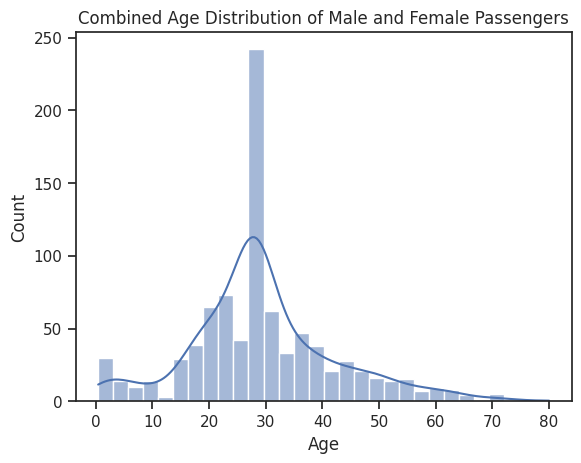

In [14]:
#STEP 2:UNIVARIATE ANALYSIS

#Combined Age Distribution of Male and Female Passengers
sns.set_theme(style='ticks')
sns.histplot(df['Age'],kde=True)
plt.title('Combined Age Distribution of Male and Female Passengers')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


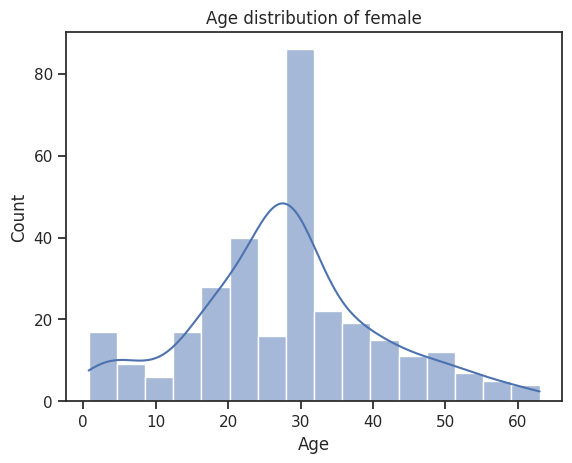

In [15]:
#Age distribution for Female
female_data=df[df['Sex']=='female']#Fetching Female Age only
sns.set_theme(style='ticks')
sns.histplot(female_data['Age'],kde=True)
plt.title('Age distribution of female')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


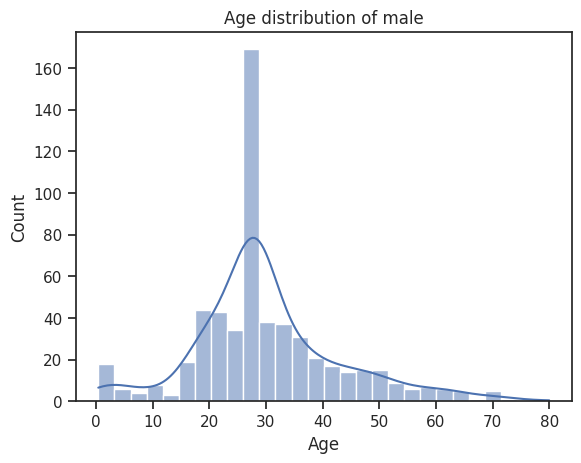

In [16]:
#Age distribution for Male
male_data=df[df['Sex']=='male'] #Fetching Male Age only
sns.set_theme(style='ticks')
sns.histplot(male_data['Age'],kde=True)
plt.title('Age distribution of male')
plt.show()
#The shape is right skewed (a longer tail on the right).
#There are a few older passengers (70–80) — these are the potential outliers.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


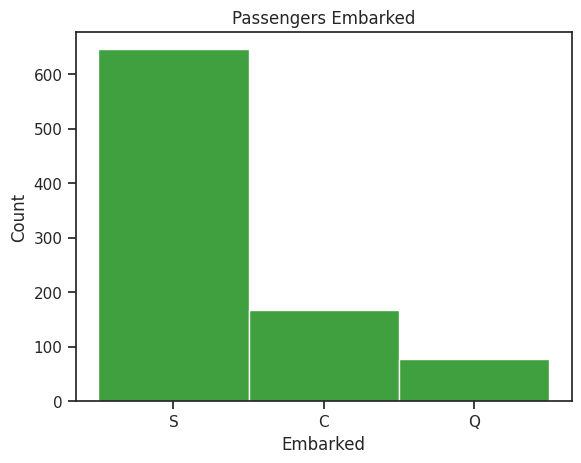

In [17]:
#Distribution of Passenger Embarkation Points
sns.set_theme(style='ticks')
sns.histplot(df['Embarked'],color='Green')
plt.title('Passengers Embarked')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


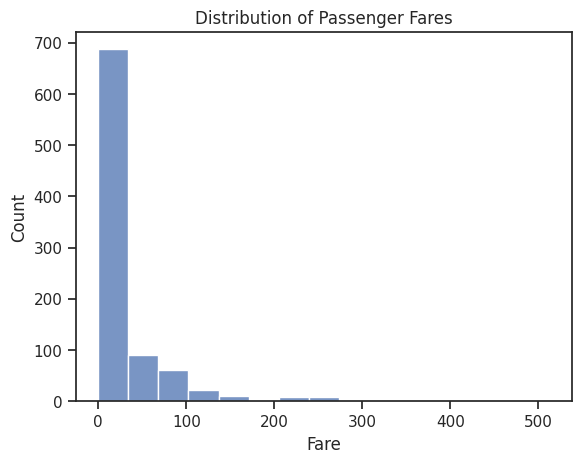

In [18]:
#Distribution of Passenger Fares 
sns.histplot(df['Fare'],bins=15)
plt.title('Distribution of Passenger Fares')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


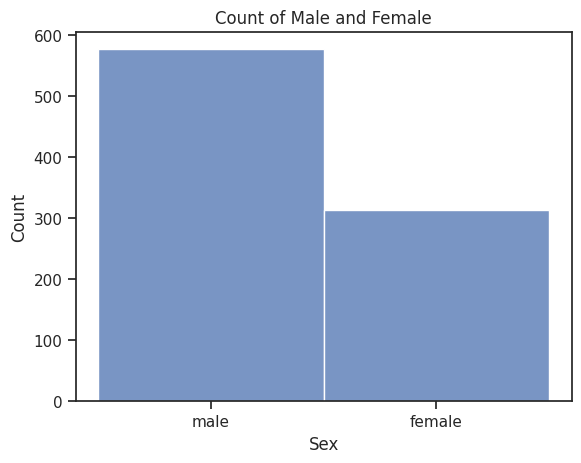

In [19]:
#Passenger Gender Count
sns.histplot(df['Sex'],discrete=True)
plt.title('Count of Male and Female')
plt.show()

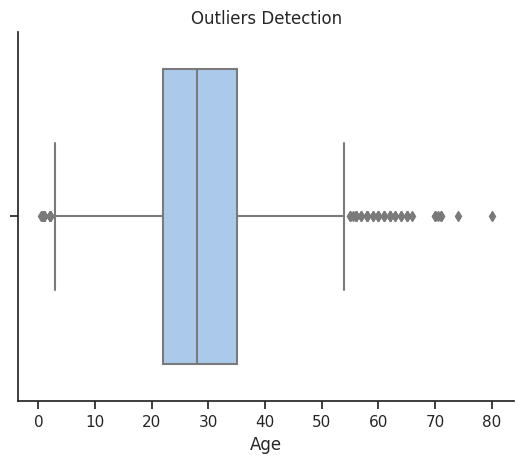

In [20]:
#Age Spread and Outlier Detection
sns.set_theme(style='ticks',palette='pastel')
sns.boxplot(x=df["Age"])
sns.despine(offset=0,trim=False)
plt.title('Outliers Detection')
plt.show()

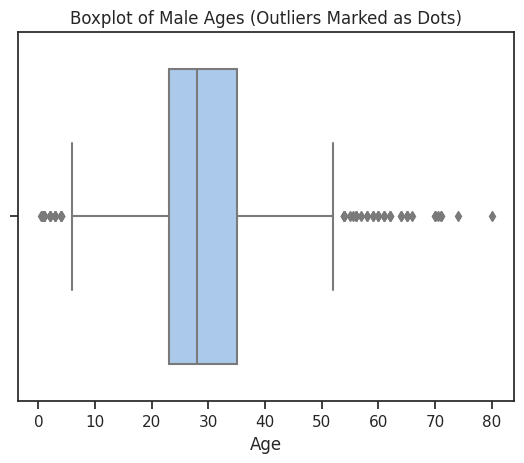

In [21]:
#Male Age Spread and Outlier Detection
sns.boxplot(x='Age', data=male_data)
plt.title("Boxplot of Male Ages (Outliers Marked as Dots)")
plt.show()

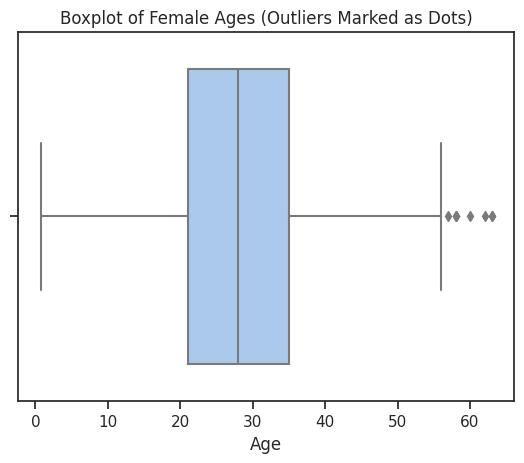

In [22]:
#Female Age Spread and Outlier Detection
sns.boxplot(x=female_data['Age'])
plt.title("Boxplot of Female Ages (Outliers Marked as Dots)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


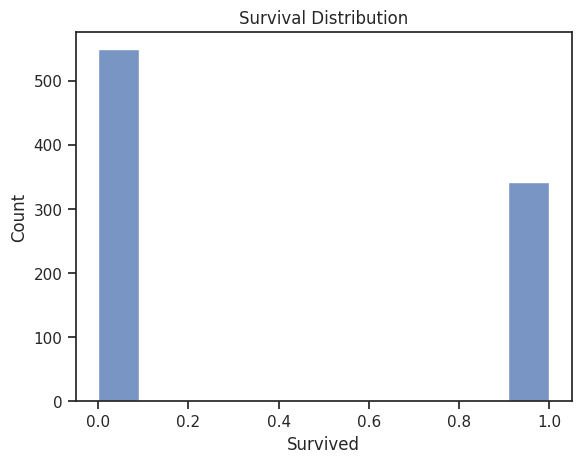

In [23]:
#Distribution of Passenger Survival Status
sns.set_theme(style='ticks')
sns.histplot(df['Survived'])
plt.title('Survival Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

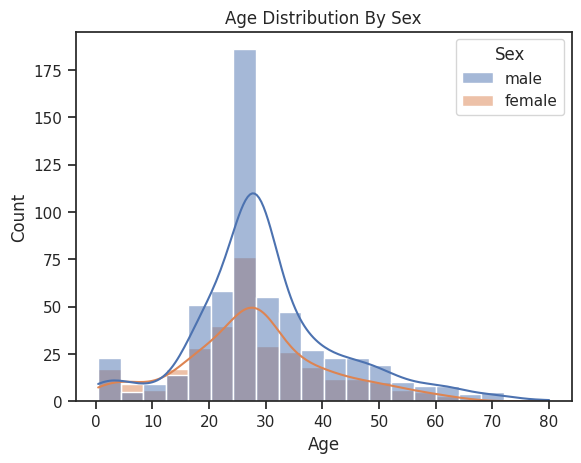

In [24]:
#STEP 3:BIVARIATE ANALYSIS

#Age Distribution By Sex
sns.histplot(x=df["Age"], hue=df["Sex"],bins=20,kde=True)
plt.title('Age Distribution By Sex')
plt.show()
#Both males and females cluster around 20–40 years old.
#A small secondary bump around 0–10 years shows a few children
#There’s a long tail toward the right hence right skewed (ages 60–80)

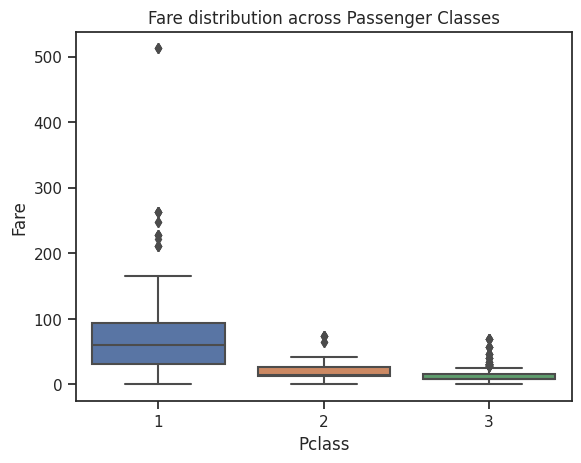

In [25]:
#Fare distribution across Passenger Classes
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare distribution across Passenger Classes')
plt.show()
#Justifcation:We pair these features to explore whether Pclass influences ticket price as its an important factor in both this case

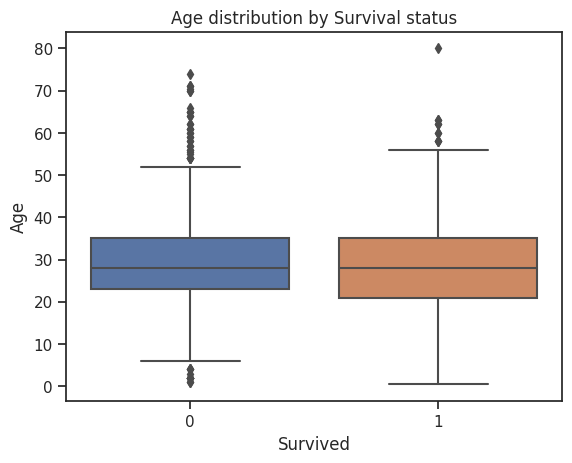

In [26]:
#Age distribution by Survival status
sns.boxplot(x='Survived', y='Age', data=df)#justification:This pairing tests the hypothesis that younger passengers were prioritized during evacuation
plt.title('Age distribution by Survival status')
plt.show()

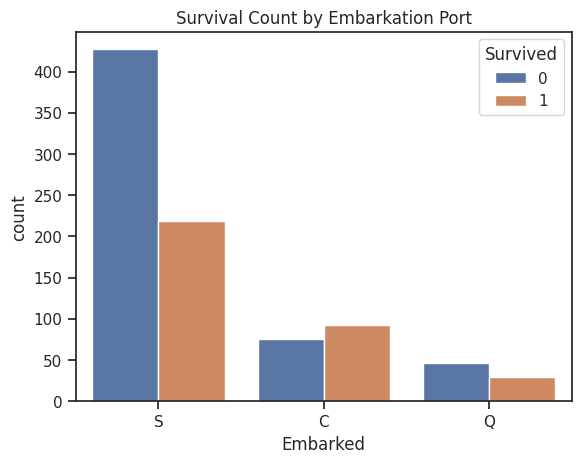

In [27]:
#Survival Count by Embarkation Port
sns.countplot(x='Embarked', hue='Survived', data=df)#Justification:We pair Embarked with Survived to explore location based social class differences,since boarding location correlates with class and wealth
plt.title('Survival Count by Embarkation Port')
plt.show()

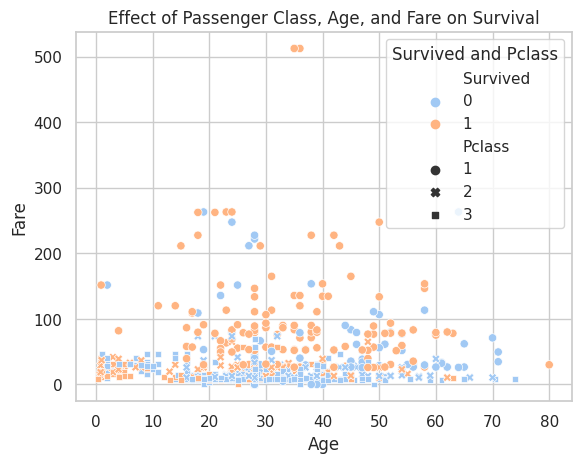

In [28]:
#STEP 4:MULTIVARIATE ANALYSIS

#How Pclass, Age, and Fare jointly affect Survival
sns.set_theme(style='whitegrid', palette='pastel')
# Scatter plot showing combined effect of Age and Fare, colored by Survival and grouped by Pclass
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Pclass')
plt.title('Effect of Passenger Class, Age, and Fare on Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived and Pclass')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


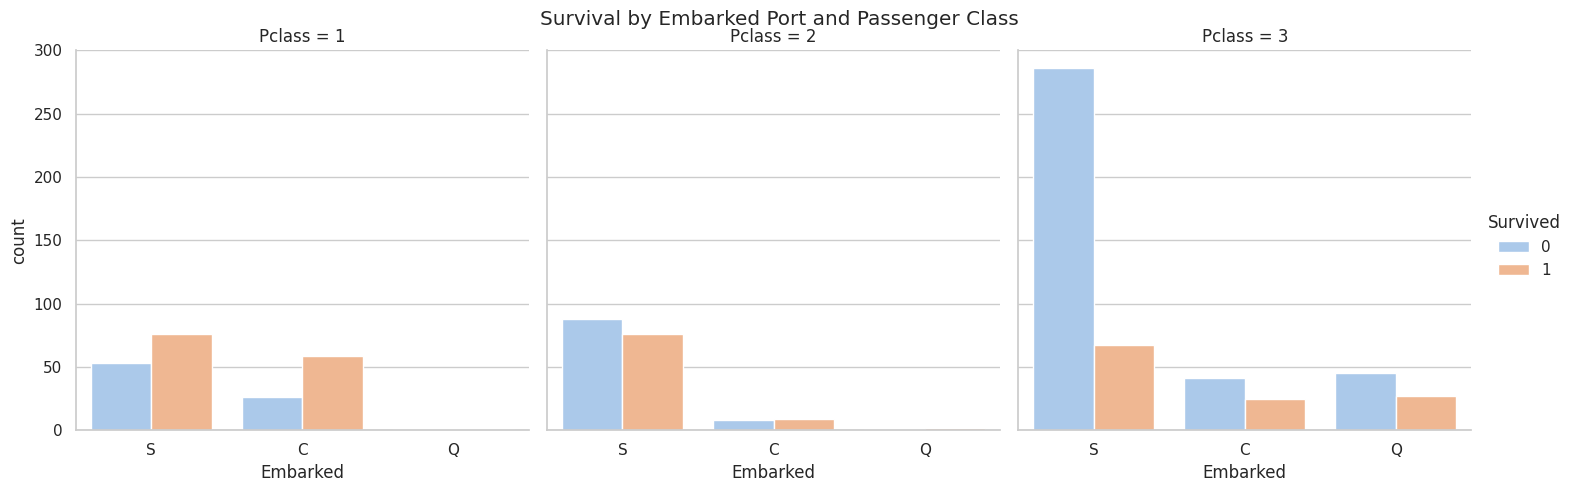

In [29]:
#Survival by Embarked location and Passenger Class
sns.set_theme(style='whitegrid', palette='pastel')
sns.catplot(x='Embarked', hue='Survived', col='Pclass', kind='count',data=df)
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival by Embarked Port and Passenger Class')
plt.show()

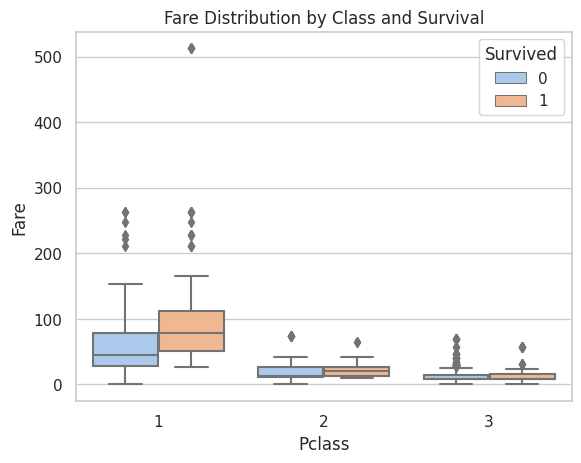

In [30]:
#How Fare Distributions Differ across both Pclass and Survived
sns.boxplot(x=df['Pclass'], y=df['Fare'], hue=df['Survived'],palette='pastel')
plt.title('Fare Distribution by Class and Survival')
plt.show()

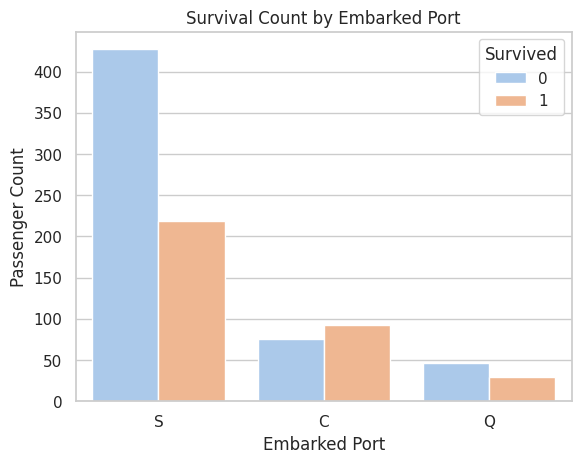

In [31]:
# Grouped Bar Plot of Survival by Embarked and Passenger Class
sns.set_theme(style='whitegrid', palette='pastel')
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Passenger Count')
plt.legend(title='Survived')
plt.show()


In [32]:
#STEP 5:OUTLIER DECTECTION AND HANDLING

#After careful consideration, outliers were retained in the dataset because:
#They represent true variability in passenger wealth and demographics
#Removing them could distort the story of socioeconomic differences on the Titanic
#Outliers in Fare help explain survival inequality,wealthier passengers (with higher fares) had higher survival rates
#Outliers in Age represent legitimate passengers (e.g.elderly individuals)


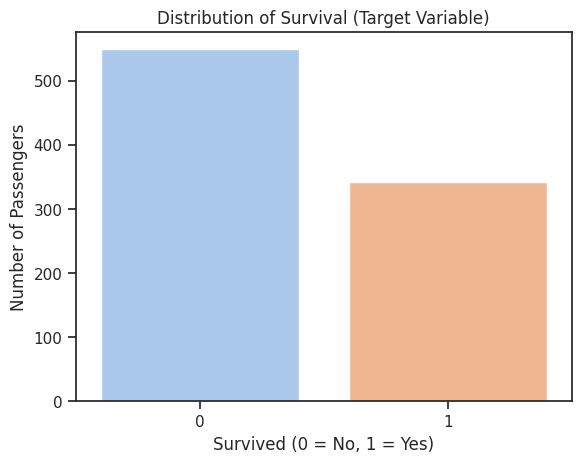

In [33]:
#STEP 6:ANALYZING THE TARGET/DEPENDENT VARIABLE SURVIVED

#(a)The distribution of the target variable (Survived) using countplots or bar plots
sns.set_theme(style='ticks', palette='pastel')
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survival (Target Variable)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()
#The data is imbalanced since 0>1
#The survival variable is imbalanced,with a higher number of non-survivors  compared to survivors


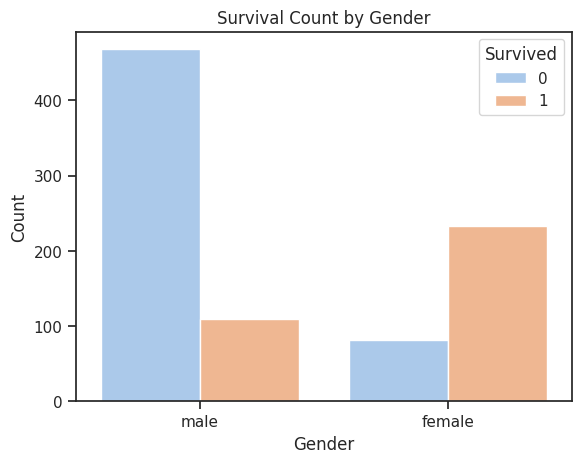

In [34]:
#(b)Analyze Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
#More females survived compared to males

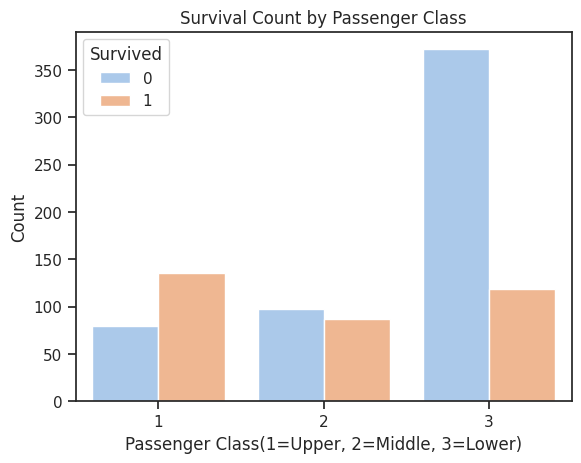

In [35]:
#(c)Analyze Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class(1=Upper, 2=Middle, 3=Lower)')
plt.ylabel('Count')
plt.show()
#First class passengers had the highest survival rate
#Third class passengers had the lowest
#Higher passenger class was associated with greater survival probability,reflecting socioeconomic influence on safety access

<function matplotlib.pyplot.show(close=None, block=None)>

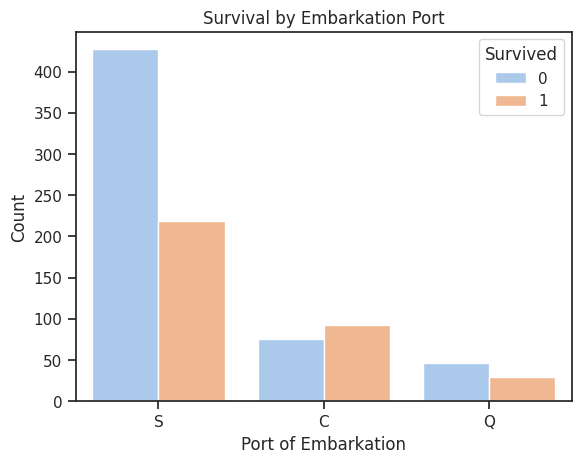

In [36]:
#(d)Analyze Survival by Embarkation Port
sns.countplot(data=df, x='Embarked', hue='Survived', palette='pastel')
plt.title('Survival by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show
#Passengers from Port C often had better survival rates
#Port S had the lowest survival

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


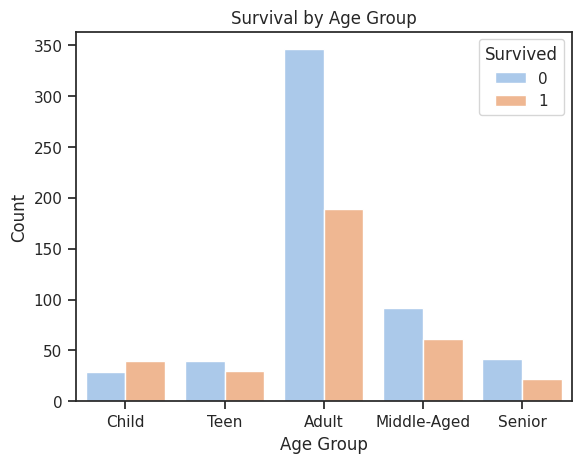

In [37]:
#(e)Analyze Survival by Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,50,80], labels=['Child','Teen','Adult','Middle-Aged','Senior'])
sns.countplot(data=df, x='AgeGroup', hue='Survived', palette='pastel')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
#Children (0–12) had higher survival rates
#Adults (20–50) had lower survival rates

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


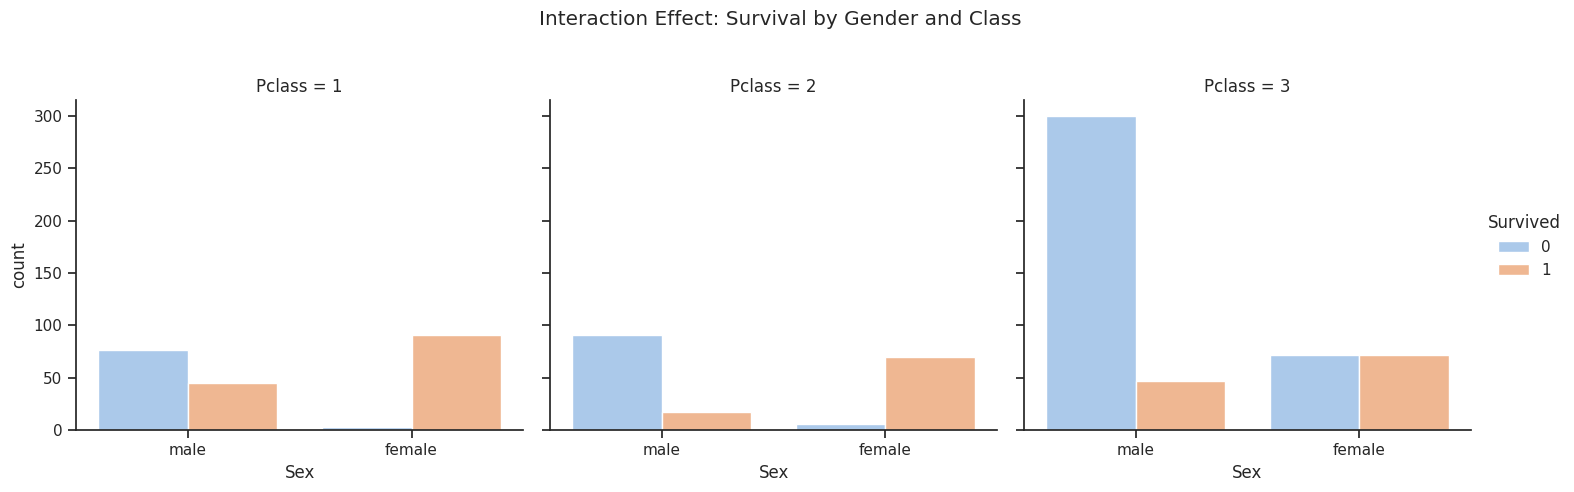

In [38]:
#(f)Combined Analysis
sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=df, palette='pastel')
plt.subplots_adjust(top=0.8)
plt.suptitle('Interaction Effect: Survival by Gender and Class')
plt.show()
#Female passengers in 1st class had the highest survival rate
#Male passengers in 3rd class had the lowest

In [39]:
df.to_csv('/kaggle/working/cleaned_Titanic.csv', index=False)